In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Load dataset
usa = pd.read_csv('enigma_Aug_8_2020.csv')
usa.head()

state_fips state_name        lat       long      date   cases  deaths  \
0          36   New York  42.913397 -75.596272  7/1/2020  398770   31791   
1          36   New York  42.913397 -75.596272  7/2/2020  399642   31814   
2          36   New York  42.913397 -75.596272  7/3/2020  400561   31836   
3          36   New York  42.913397 -75.596272  7/4/2020  401286   31860   
4          36   New York  42.913397 -75.596272  7/5/2020  401822   31895   

   tests_positive  tests_negative  tests_pending      tests  patients_icu  \
0        394079.0       3577569.0            NaN  3971648.0         226.0   
1        394954.0       3646639.0            NaN  4041593.0         209.0   
2        395872.0       3712113.0            NaN  4107985.0         188.0   
3        396598.0       3773790.0            NaN  4170388.0         190.0   
4        397131.0       3836672.0            NaN  4233803.0         178.0   

   patients_hosp  patients_vent  recovered  
0          879.0          139.0    70590.0  
1          878.0          129.0    70698.0  
2          857.0          125.0    70794.0  
3          844.0          119.0    70877.0  
4          832.0          116.0    70968.0

In [3]:
# Remove not needed columns
usa = usa.drop(columns = ['state_fips', 'lat', 'long'])
usa.head()

state_name      date   cases  deaths  tests_positive  tests_negative  \
0   New York  7/1/2020  398770   31791        394079.0       3577569.0   
1   New York  7/2/2020  399642   31814        394954.0       3646639.0   
2   New York  7/3/2020  400561   31836        395872.0       3712113.0   
3   New York  7/4/2020  401286   31860        396598.0       3773790.0   
4   New York  7/5/2020  401822   31895        397131.0       3836672.0   

   tests_pending      tests  patients_icu  patients_hosp  patients_vent  \
0            NaN  3971648.0         226.0          879.0          139.0   
1            NaN  4041593.0         209.0          878.0          129.0   
2            NaN  4107985.0         188.0          857.0          125.0   
3            NaN  4170388.0         190.0          844.0          119.0   
4            NaN  4233803.0         178.0          832.0          116.0   

   recovered  
0    70590.0  
1    70698.0  
2    70794.0  
3    70877.0  
4    70968.0

In [4]:
# Convert dates to datetime
usa['datetime'] = pd.to_datetime(usa['date'])
usa.tail()

state_name       date   cases  deaths  tests_positive  tests_negative  \
8149   New York  6/26/2020  395972   31075        391220.0       3290097.0   
8150   New York  6/27/2020  396669   31105        391923.0       3362656.0   
8151   New York  6/28/2020  397293   31137        392539.0       3423946.0   
8152   New York  6/29/2020  397684   31143        392930.0       3469983.0   
8153   New York  6/30/2020  398142   31776        393454.0       3521484.0   

      tests_pending      tests  patients_icu  patients_hosp  patients_vent  \
8149            NaN  3681317.0         244.0          951.0          167.0   
8150            NaN  3754579.0         230.0          908.0          167.0   
8151            NaN  3816485.0         229.0          869.0          167.0   
8152            NaN  3862913.0         216.0          853.0          136.0   
8153            NaN  3914938.0         217.0          891.0          137.0   

      recovered   datetime  
8149    70010.0 2020-06-26  
8150    70010.0 2020-06-27  
8151    70010.0 2020-06-28  
8152    70435.0 2020-06-29  
8153    70487.0 2020-06-30

###  West North Central Divsion 4 (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)

In [5]:
# Creat DF for just West North Central
west_northern_central =  usa[(usa['state_name']=='Iowa') | (usa['state_name'] == 'Kansas') |
                      (usa['state_name'] == 'Minnesota') | (usa['state_name'] == 'Missouri') | 
                     (usa['state_name']=='North Dakota') | (usa['state_name']=='South Dakota')] 

west_northern_central.head()

state_name       date  cases  deaths  tests_positive  tests_negative  \
176  North Dakota  3/11/2020      1       0             0.0             7.0   
177  North Dakota  3/12/2020      1       0             1.0            12.0   
178  North Dakota  3/13/2020      1       0             1.0            39.0   
179  North Dakota  3/14/2020      1       0             1.0            54.0   
180  North Dakota  3/15/2020      1       0             1.0            95.0   

     tests_pending  tests  patients_icu  patients_hosp  patients_vent  \
176            6.0    7.0           NaN            NaN            NaN   
177           14.0   13.0           NaN            NaN            NaN   
178           12.0   40.0           NaN            NaN            NaN   
179           14.0   55.0           NaN            NaN            NaN   
180            4.0   96.0           NaN            NaN            NaN   

     recovered   datetime  
176        NaN 2020-03-11  
177        NaN 2020-03-12  
178        NaN 2020-03-13  
179        NaN 2020-03-14  
180        NaN 2020-03-15

In [6]:
# Summing case count for Western Northern Central
# Groupby to consolidate cases by entire region

wnc_group = west_northern_central.groupby(["datetime"]).sum()
wnc_group.tail()

cases  deaths  tests_positive  tests_negative  tests_pending  \
datetime                                                                    
2020-07-24  171407    4208        169034.0       2332495.0            0.0   
2020-07-25  174036    4219        171821.0       2362999.0            0.0   
2020-07-26  176951    4235        174660.0       2391636.0            0.0   
2020-07-27  180225    4261        178009.0       2423595.0            0.0   
2020-07-28  182605    4293        177964.0       2448856.0            0.0   

                tests  patients_icu  patients_hosp  patients_vent  recovered  
datetime                                                                      
2020-07-24  2501529.0         278.0         1647.0          210.0    84981.0  
2020-07-25  2534820.0         285.0         1964.0          211.0    86157.0  
2020-07-26  2566296.0         290.0         1961.0          212.0    87249.0  
2020-07-27  2601604.0         262.0         1857.0          215.0    88412.0  
2020-07-28  2626820.0         271.0         1640.0          167.0    90149.0

In [7]:
# Sort by datetime and reset index
wnc_group.sort_values(by = 'datetime')
wnc_group = wnc_group.reset_index()
wnc_group.tail()

datetime   cases  deaths  tests_positive  tests_negative  tests_pending  \
140 2020-07-24  171407    4208        169034.0       2332495.0            0.0   
141 2020-07-25  174036    4219        171821.0       2362999.0            0.0   
142 2020-07-26  176951    4235        174660.0       2391636.0            0.0   
143 2020-07-27  180225    4261        178009.0       2423595.0            0.0   
144 2020-07-28  182605    4293        177964.0       2448856.0            0.0   

         tests  patients_icu  patients_hosp  patients_vent  recovered  
140  2501529.0         278.0         1647.0          210.0    84981.0  
141  2534820.0         285.0         1964.0          211.0    86157.0  
142  2566296.0         290.0         1961.0          212.0    87249.0  
143  2601604.0         262.0         1857.0          215.0    88412.0  
144  2626820.0         271.0         1640.0          167.0    90149.0

In [8]:
# Finish datetime conversion
wnc_group['datetime'] = pd.to_datetime(wnc_group['datetime'])
wnc_group['day'] = wnc_group['datetime'].map(lambda x: x.day)
wnc_group['month'] = wnc_group['datetime'].map(lambda x: x.month)
wnc_group['year'] = wnc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
wnc_group['growth_rate'] = wnc_group['cases'].pct_change()
wnc_group.tail()

datetime   cases  deaths  tests_positive  tests_negative  tests_pending  \
140 2020-07-24  171407    4208        169034.0       2332495.0            0.0   
141 2020-07-25  174036    4219        171821.0       2362999.0            0.0   
142 2020-07-26  176951    4235        174660.0       2391636.0            0.0   
143 2020-07-27  180225    4261        178009.0       2423595.0            0.0   
144 2020-07-28  182605    4293        177964.0       2448856.0            0.0   

         tests  patients_icu  patients_hosp  patients_vent  recovered  day  \
140  2501529.0         278.0         1647.0          210.0    84981.0   24   
141  2534820.0         285.0         1964.0          211.0    86157.0   25   
142  2566296.0         290.0         1961.0          212.0    87249.0   26   
143  2601604.0         262.0         1857.0          215.0    88412.0   27   
144  2626820.0         271.0         1640.0          167.0    90149.0   28   

     month  year  growth_rate  
140      7  2020     0.022483  
141      7  2020     0.015338  
142      7  2020     0.016749  
143      7  2020     0.018502  
144      7  2020     0.013206

In [9]:
# Look at the stats
wnc_group['growth_rate'].describe()

count    144.000000
mean       0.102193
std        0.227918
min        0.007319
25%        0.015921
50%        0.027547
75%        0.075900
max        2.000000
Name: growth_rate, dtype: float64

In [10]:
# Check for Null Values
wnc_group.isnull().sum()

datetime          0
cases             0
deaths            0
tests_positive    0
tests_negative    0
tests_pending     0
tests             0
patients_icu      0
patients_hosp     0
patients_vent     0
recovered         0
day               0
month             0
year              0
growth_rate       1
dtype: int64

In [11]:
# Drop the null value since there is only 1
wnc_group = wnc_group.dropna()

### Visualize Growth Rate and Cases

/Users/mak/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


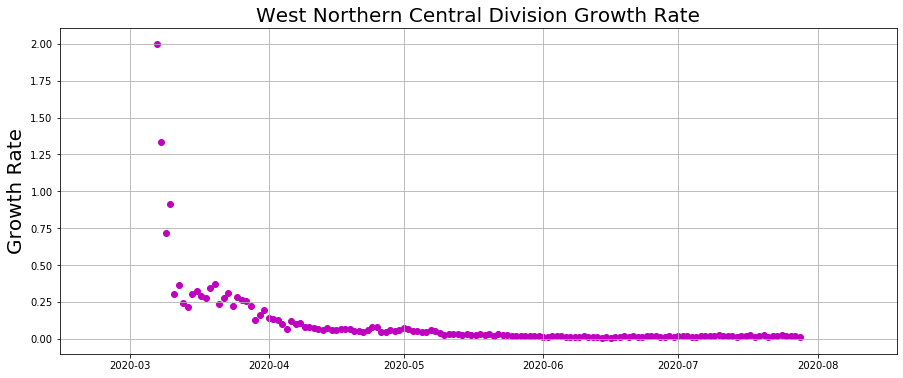

In [12]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(wnc_group['datetime'],wnc_group['growth_rate'],c='m',)
plt.grid(True)
plt.title("West Northern Central Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

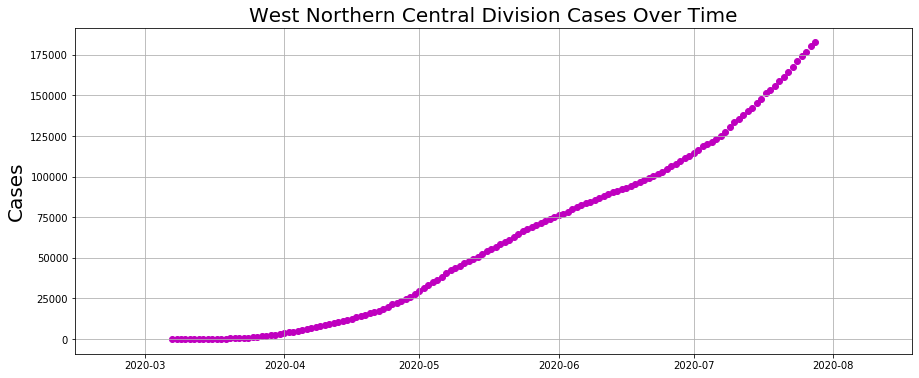

In [13]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(wnc_group['datetime'],wnc_group['cases'],c='m',)
plt.grid(True)
plt.title('West Northern Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### Linear Regression

In [16]:
# Make the model
wnc_model = LinearRegression()

In [20]:
# Assign the features and the target
X_wnc = wnc_group[["day", "month", "year"]]
y_wnc = wnc_group[["cases"]]

day  month  year
1      7      3  2020
2      8      3  2020
3      9      3  2020
4     10      3  2020
5     11      3  2020
..   ...    ...   ...
140   24      7  2020
141   25      7  2020
142   26      7  2020
143   27      7  2020
144   28      7  2020

[144 rows x 3 columns]

In [18]:
# Split the data for training and testing
X_train_wnc, X_test_wnc, y_train_wnc, y_test_wnc = train_test_split(X_wnc, y_wnc, random_state=42) 

In [19]:
# Fit the model with the training data and score it with the testing data
wnc_model.fit(X_train_wnc, y_train_wnc)
wnc_model.score(X_test_wnc, y_test_wnc)

0.9637699814619062

In [89]:
# Make Dataframe for the holidays which will be used for the predicitons:
# Labor Day, Election Day, Thanksgiving, Christmas

holidays = {"day": [7, 3, 26, 25], "month": [9, 11, 11, 12], "year": [2020, 2020, 2020, 2020]}
predict_holidays = pd.DataFrame(holidays)
predict_holidays["datetime"] = pd.to_datetime((predict_holidays.year*10000+predict_holidays.month*100+predict_holidays.day).apply(str),format='%Y%m%d')
predict_holidays

day  month  year   datetime
0    7      9  2020 2020-09-07
1    3     11  2020 2020-11-03
2   26     11  2020 2020-11-26
3   25     12  2020 2020-12-25

In [90]:
# Predict with the model
predictions = wnc_model.predict(predict_holidays[["day", "month", "year"]])
predictions

# convert predictions from ndarray to list
preds_arr = []
for i in predictions:
    preds_arr.append(np.asscalar(i))


/Users/mak/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


In [91]:
# Add the precitions back to the DataFrame and convert from object to float so we can use it for graphing
predict_holidays["predicted_cases"] = predictions
predict_holidays["predicted_cases"] = predict_holidays['predicted_cases'].astype('float')
predict_holidays.head()

day  month  year   datetime  predicted_cases
0    7      9  2020 2020-09-07    205261.153470
1    3     11  2020 2020-11-03    278260.403275
2   26     11  2020 2020-11-26    309506.368117
3   25     12  2020 2020-12-25    347364.513231

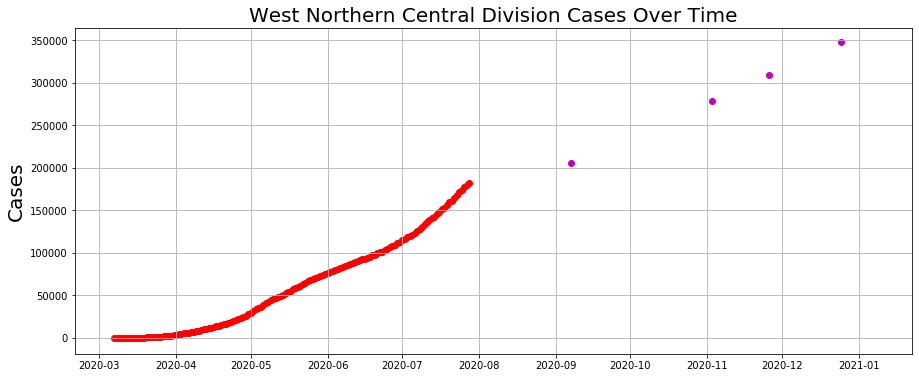

In [103]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (15, 6))
plt.scatter(predict_holidays['datetime'],predict_holidays['predicted_cases'],c='m',)
plt.scatter(wnc_group['datetime'],wnc_group['cases'],c='r',)
plt.grid(True)
plt.title('West Northern Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### South Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)

In [ ]:
# Make Df for just South Atlantic divsion.

south_atlantic = usa[(usa['state_name']=='Delaware') | (usa['state_name'] == 'Flordia') |
                      (usa['state_name'] == 'Georgia') | (usa['state_name'] == 'Maryland') | 
                     (usa['state_name']=='North Carolina') | (usa['state_name']=='South Carolina') |
                     (usa['state_name']=='Virginia') | (usa['state_name']== 'District of Columbia') |
                    (usa['state_name'] == 'West Virginia')]
south_atlantic.head()

In [ ]:
# Summing case count for South Atlantic
# Groupby to consolidate cases by entire region

sa_group = south_atlantic.groupby(["datetime"]).sum()
sa_group.tail()

In [ ]:
# Sort by datetime and reset index
sa_group.sort_values(by = 'datetime')
sa_group = sa_group.reset_index()
sa_group.tail()

In [ ]:
# Finish datetime conversion
sa_group['datetime'] = pd.to_datetime(sa_group['datetime'])
sa_group['day'] = sa_group['datetime'].map(lambda x: x.day)
sa_group['month'] = sa_group['datetime'].map(lambda x: x.month)
sa_group['year'] = sa_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
sa_group['growth_rate'] = sa_group['cases'].pct_change()
sa_group.tail()

In [ ]:
# Look at the stats
sa_group['growth_rate'].describe()

### Visualize Growth Rate and Cases

In [ ]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(sa_group['datetime'],sa_group['growth_rate'],c='c',)
plt.grid(True)
plt.title("South Atlantic Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

In [ ]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(sa_group['datetime'],sa_group['cases'],c='c',)
plt.grid(True)
plt.title('South Atlantic Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### South Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)

In [ ]:
# Create DF for just East South Central Divsion
east_south_central =  usa[(usa['state_name']=='Alabama') | (usa['state_name'] == 'Kentucky') |
                      (usa['state_name'] == 'Mississippi') | (usa['state_name'] == 'Tennessee')] 

east_south_central.head()

In [ ]:
# Summing case count for East South Central
# Groupby to consolidate cases by entire region

esc_group = east_south_central.groupby(["datetime"]).sum()
esc_group.tail()

In [ ]:
# Sort by datetime and reset index
esc_group.sort_values(by = 'datetime')
esc_group = esc_group.reset_index()
esc_group.tail()

In [ ]:
# Finish datetime conversion
esc_group['datetime'] = pd.to_datetime(esc_group['datetime'])
esc_group['day'] = esc_group['datetime'].map(lambda x: x.day)
esc_group['month'] = esc_group['datetime'].map(lambda x: x.month)
esc_group['year'] = esc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
esc_group['growth_rate'] = esc_group['cases'].pct_change()
esc_group.tail()

In [ ]:
# Look at the stats
esc_group['growth_rate'].describe()

### Visualize Growth Rate and Cases

In [ ]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(esc_group['datetime'],esc_group['growth_rate'],c='b',)
plt.grid(True)
plt.title("East South Central Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

In [ ]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(esc_group['datetime'],esc_group['cases'],c='b')
plt.grid(True)
plt.title('East South Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### South Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)

In [ ]:
west_south_central =  usa[(usa['state_name']=='Arkansas') | (usa['state_name'] == 'Louisiana') |
                      (usa['state_name'] == 'Oklahoma') | (usa['state_name'] == 'Texas') ] 

west_south_central.head()

In [ ]:
# Summing case count for West South Central
# Groupby to consolidate cases by entire region

wsc_group = west_south_central.groupby(["datetime"]).sum()
wsc_group.tail()

In [ ]:
# Sort by datetime and reset index
wsc_group.sort_values(by = 'datetime')
wsc_group = wsc_group.reset_index()
wsc_group.tail()

In [ ]:
# Finish datetime conversion
wsc_group['datetime'] = pd.to_datetime(wsc_group['datetime'])
wsc_group['day'] = wsc_group['datetime'].map(lambda x: x.day)
wsc_group['month'] = wsc_group['datetime'].map(lambda x: x.month)
wsc_group['year'] = wsc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
wsc_group['growth_rate'] = wsc_group['cases'].pct_change()
wsc_group.tail()

In [ ]:
# Look at the stats
wsc_group['growth_rate'].describe()

### Visualize Growth Rate and Cases

In [ ]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(wsc_group['datetime'],wsc_group['growth_rate'],c='xkcd:magenta',)
plt.grid(True)
plt.title("West South Central Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

In [ ]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(wsc_group['datetime'],wsc_group['cases'],c='xkcd:magenta')
plt.grid(True)
plt.title('West South Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### West Mountain Divsion 8 (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)

In [ ]:
# Create a DF for just Mountain divsion
mountain =  usa[(usa['state_name']=='Arizona') | (usa['state_name'] == 'Colorado') |
                      (usa['state_name'] == 'Idaho') | (usa['state_name'] == 'Montana') | 
                     (usa['state_name']=='Nevada') | (usa['state_name']=='New Mexico') |
                     (usa['state_name']=='Utah') | (usa['state_name']== 'Wyoming') ]

mountain.head()

In [ ]:
# Summing case count for Mountain Division
# Groupby to consolidate cases by entire region

md_group = mountain.groupby(["datetime"]).sum()
md_group.tail()

In [ ]:
# Sort by datetime and reset index
md_group.sort_values(by = 'datetime')
md_group = md_group.reset_index()
md_group.tail()

In [ ]:
# Finish datetime conversion
md_group['datetime'] = pd.to_datetime(md_group['datetime'])
md_group['day'] = md_group['datetime'].map(lambda x: x.day)
md_group['month'] = md_group['datetime'].map(lambda x: x.month)
md_group['year'] = md_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
md_group['growth_rate'] = md_group['cases'].pct_change()
md_group.tail()

In [ ]:
# Look at the stats
md_group['growth_rate'].describe()

### Visualize Growth Rate and Cases

In [ ]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(md_group['datetime'],md_group['growth_rate'],c='xkcd:sky blue',)
plt.grid(True)
plt.title("Mountain Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

In [ ]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(md_group['datetime'],md_group['cases'],c='xkcd:sky blue')
plt.grid(True)
plt.title('Mountain Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### West Pacific (Alaska, California, Hawaii, Oregon, and Washington)

In [ ]:
# Make DF for just Pacific Divsion
pacific =  usa[(usa['state_name']=='California') | (usa['state_name'] == 'Hawaii') |
                      (usa['state_name'] == 'Oregon') | (usa['state_name'] == 'Washington') |
                      (usa['state_name']=='Alaska')]

pacific.head()

In [ ]:
# Summing case count for Pacific Division
# Groupby to consolidate cases by entire region

p_group = pacific.groupby(["datetime"]).sum()
p_group.tail()

In [ ]:
# Sort by datetime and reset index
p_group.sort_values(by = 'datetime')
p_group = md_group.reset_index()
p_group.tail()

In [ ]:
# Finish datetime conversion
p_group['datetime'] = pd.to_datetime(p_group['datetime'])
p_group['day'] = p_group['datetime'].map(lambda x: x.day)
p_group['month'] = p_group['datetime'].map(lambda x: x.month)
p_group['year'] = p_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
p_group['growth_rate'] = p_group['cases'].pct_change()
p_group.tail()

In [ ]:
# Look at the stats
p_group['growth_rate'].describe()

### Visualize Growth Rate and Cases

In [ ]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(p_group['datetime'],p_group['growth_rate'],c='xkcd:orange',)
plt.grid(True)
plt.title("Pacific Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

In [ ]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(p_group['datetime'],p_group['cases'],c='xkcd:orange')
plt.grid(True)
plt.title('Pacific Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()